In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


# Import Dependencies

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings("ignore") 

In [3]:
df1 = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")

# DataFrame Info

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [5]:
df1.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [6]:
df1.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [7]:
cols = {'MonsoonIntensity':'mon_int', 'TopographyDrainage':'topo_drain', 'RiverManagement':'rivr_mgmnt',
       'Deforestation':'deforest', 'Urbanization':'urban', 'ClimateChange': 'clim_cng', 'DamsQuality':'dam_qal',
       'Siltation':'silt', 'AgriculturalPractices':'arig_prac', 'Encroachments':'encroach',
       'IneffectiveDisasterPreparedness':'ineff_dis_prep', 'DrainageSystems':'drain_sys',
       'CoastalVulnerability':'coast_vul', 'Landslides':'landslides', 'Watersheds':'water_sheds',
       'DeterioratingInfrastructure':'deter_infra', 'PopulationScore':'pop_score', 'WetlandLoss':'wetlandloss',
       'InadequatePlanning':'inad_plan', 'PoliticalFactors':'pol_factors', 'FloodProbability':'flood_prob'}

In [8]:
def col_name_change(dfx,cols):
    dfx.rename(columns =cols, inplace = True)
    return "done"

In [9]:
col_name_change(df1,cols)

'done'

In [10]:
def drop_cols(dfx,cols):
    dfx.drop(columns = cols,inplace=True)
    return "done"

In [11]:
drop_cols(df1,'id')

'done'

# Exploratory Data Analysis

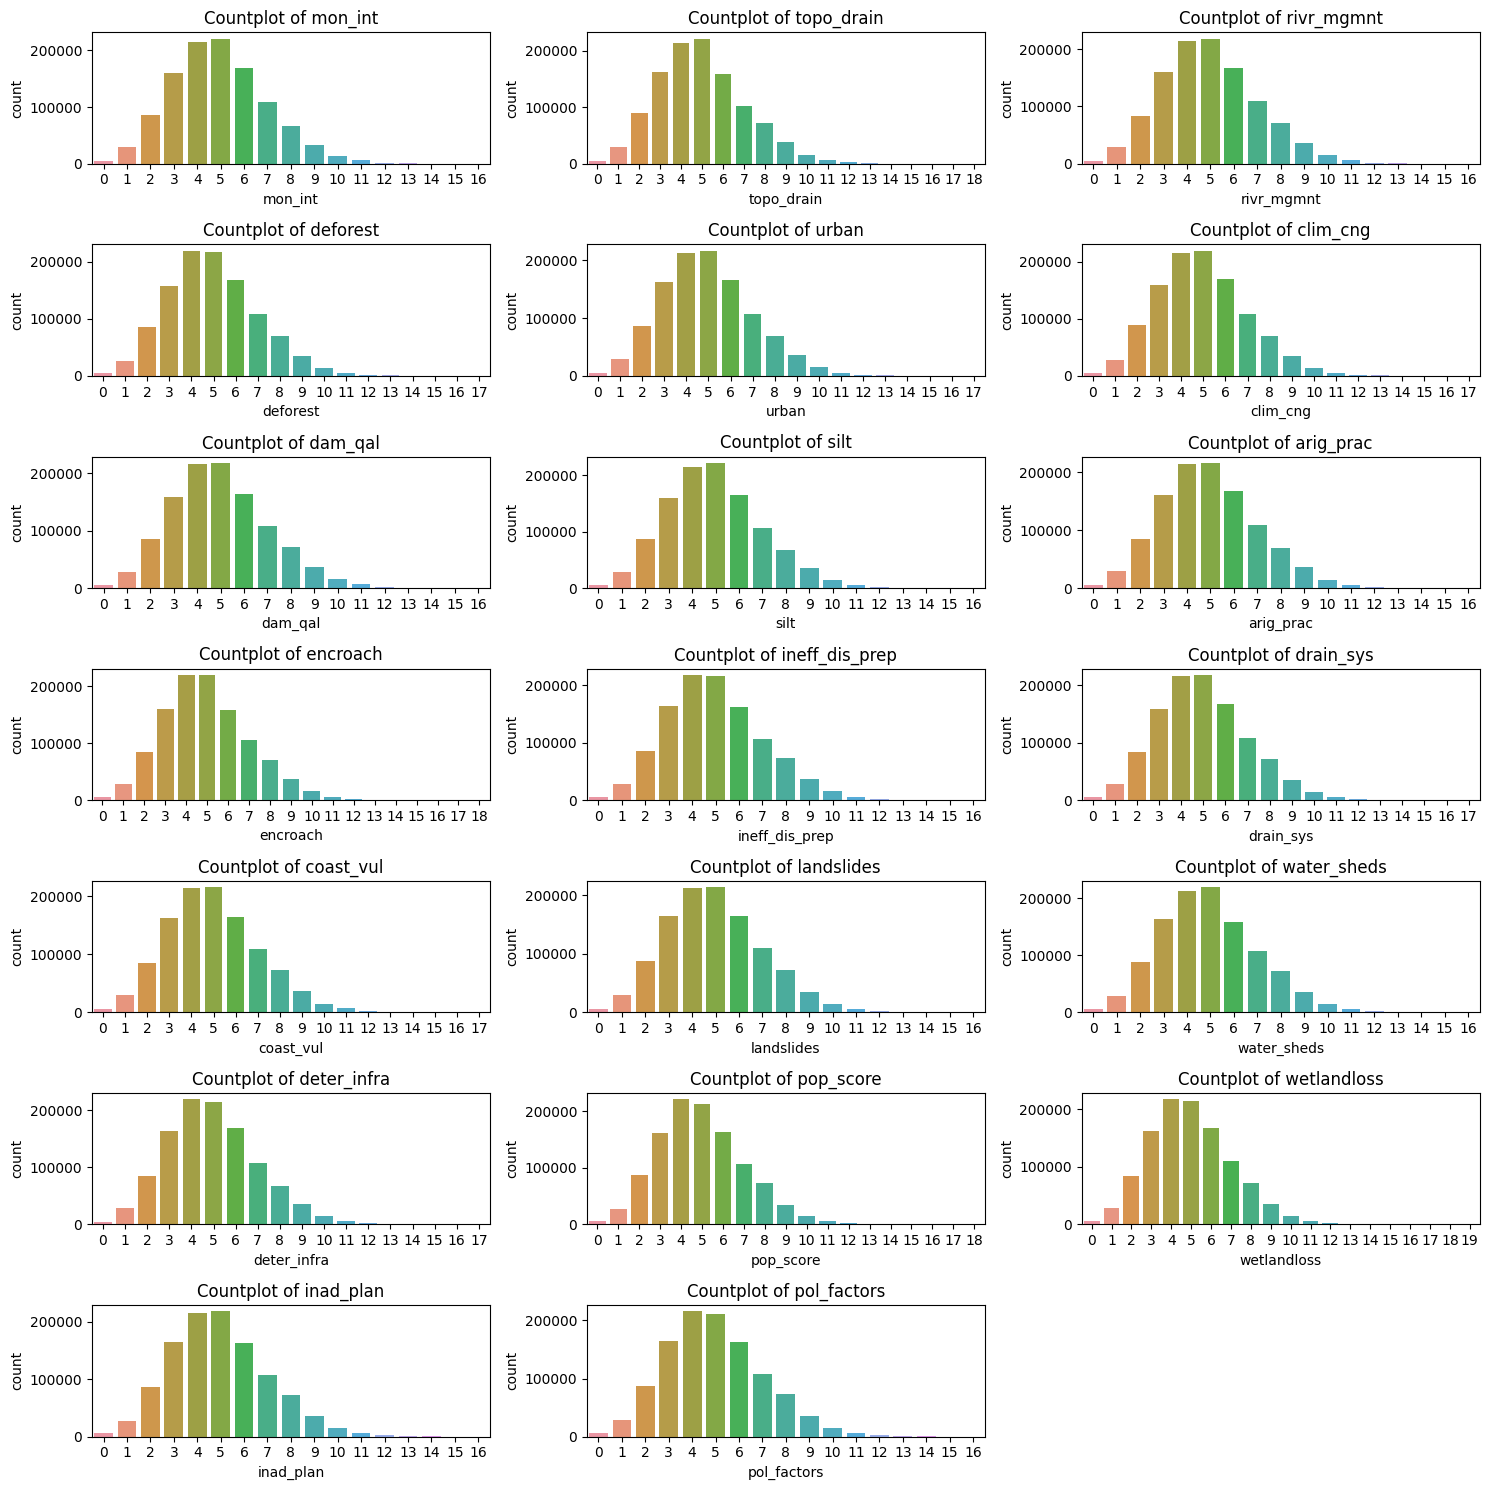

In [12]:
df1_cat=df1.select_dtypes(exclude = 'float')

plt.figure(figsize = (15,15))
for i in range(len(df1_cat.columns)):
    plt.subplot(7,3,i+1)
    sns.countplot(df1_cat, x = df1_cat.columns[i])
    plt.title(f"Countplot of {df1_cat.columns[i]}")

plt.tight_layout()
plt.show()

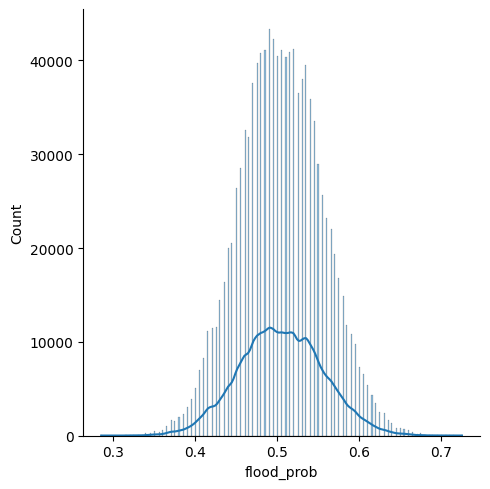

In [13]:
#target column distribution
sns.displot(df1['flood_prob'],kde =True)

# Inferences
#### Flood Probablity appears to be normally distributed

In [14]:
#p_val less than 0.05 therefore df1['flood_prob'] does not follow the normal distribution
from scipy.stats import kstest

kstest(df1['flood_prob'],'norm')

KstestResult(statistic=0.6423201785246264, pvalue=0.0, statistic_location=0.385, statistic_sign=-1)

# Outlier Treatment

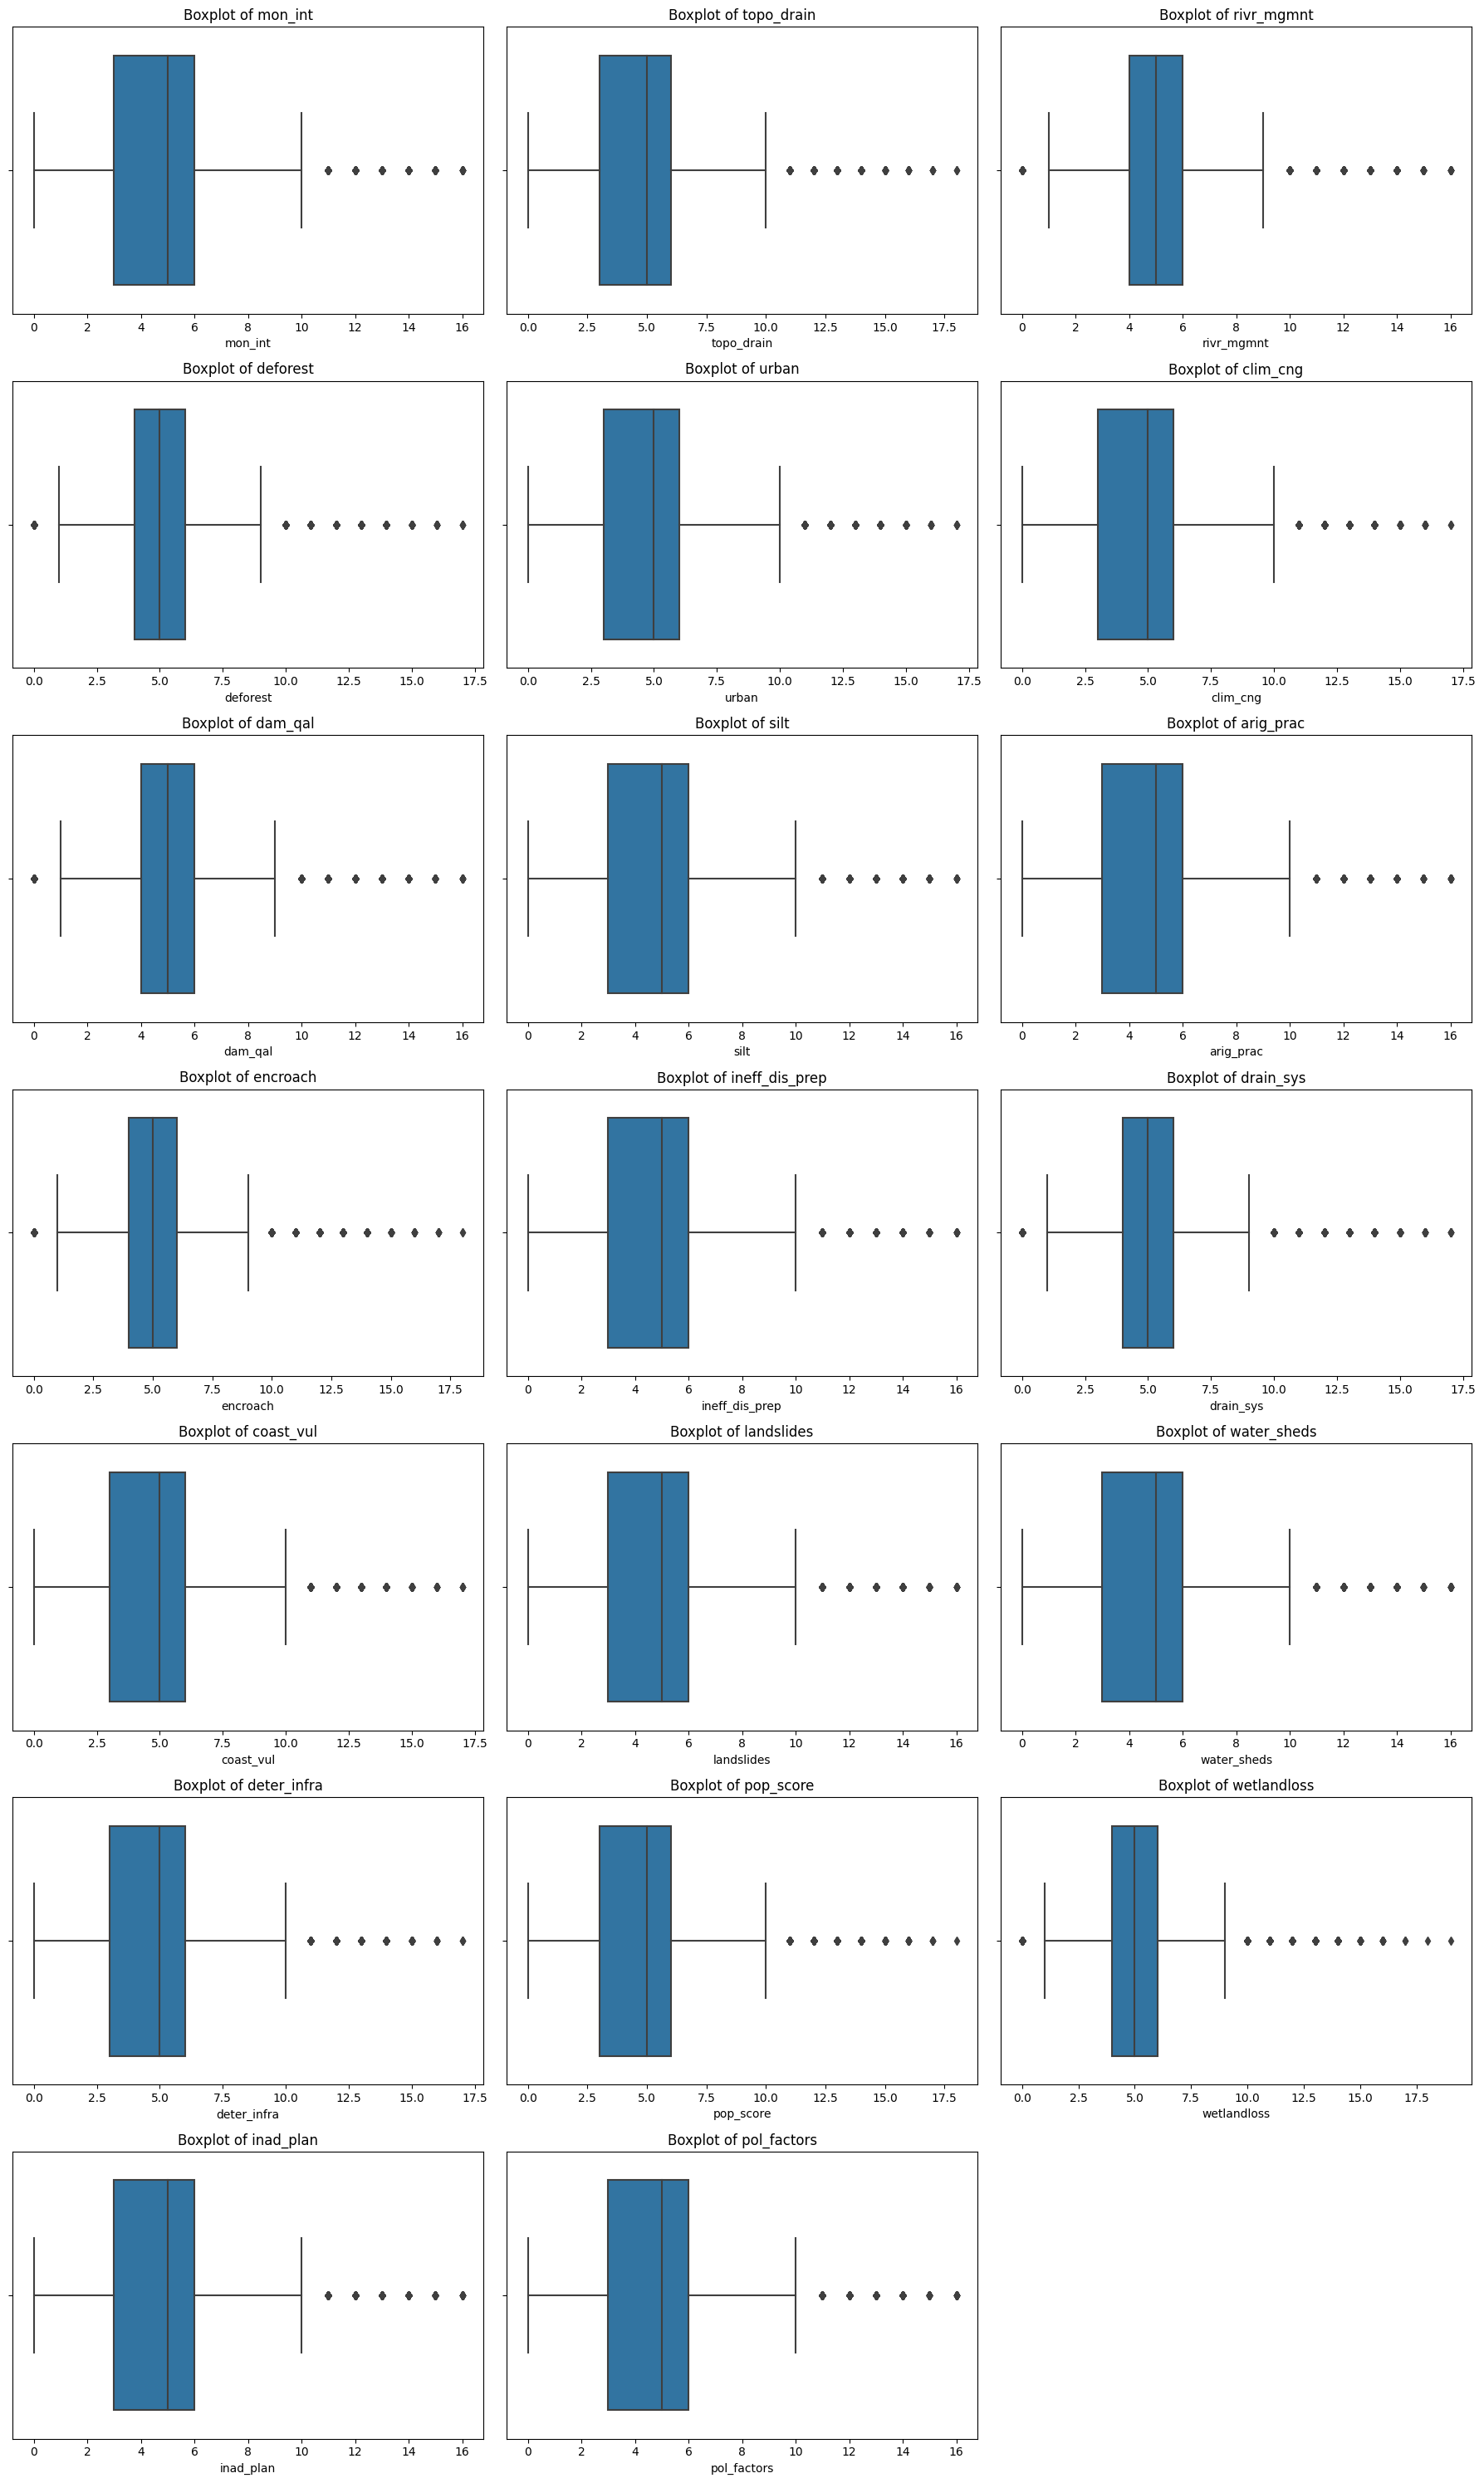

In [15]:
df1_sel=df1.select_dtypes(exclude = 'float')

plt.figure(figsize = (18,30))
for i in range(len(df1_sel.columns)):
    plt.subplot(7,3,i+1)
    sns.boxplot(df1_sel, x = df1_sel.columns[i])
    plt.title(f"Boxplot of {df1_sel.columns[i]}")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Boxplot of Flood Probablity')

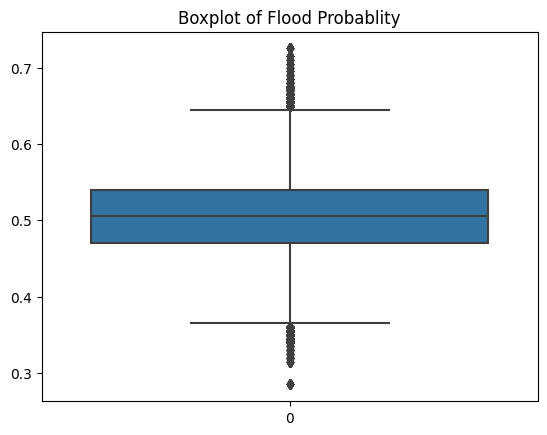

In [16]:
#boxplot of target variable
sns.boxplot(df1['flood_prob'])
plt.title(f"Boxplot of Flood Probablity")

In [17]:
def outliers(dfx):

    df_num=dfx.select_dtypes(exclude = 'object')
    #df_num.drop(columns = ['life_expectancy'],axis = 1)
    #list2=list(df1.columns).pop(list(df1.columns).index(target))
    list1= []
    for i in df_num.columns:
        q1 = np.nanquantile(dfx[i],0.25)
        q3 = np.nanquantile(dfx[i],0.75)
        iqr = q3-q1
        upper_lim = q1 - 1.5*(iqr)
        lower_lim = q3 + 1.5*(iqr)
        count = 0
        list1.append([i,len(dfx[(dfx[i]>lower_lim) | (dfx[i]<upper_lim)]),f"{round(((len(dfx[(dfx[i]>lower_lim) | (dfx[i]<upper_lim)]))/len(df1))*100,1)}%"])
    dfy = pd.DataFrame(list1,columns =['Columns','Outliers','Percent outliers'])    
    
    return dfy

In [18]:
#count of outliers and % of outliers in the data as they are less than 2% for any column, we can ignore them
outliers(df1)

,Columns,Outliers,Percent outliers
0,mon_int,9244,0.8%
1,topo_drain,9575,0.9%
2,rivr_mgmnt,29617,2.6%
3,deforest,28235,2.5%
4,urban,9184,0.8%
5,clim_cng,8702,0.8%
6,dam_qal,31097,2.8%
7,silt,9079,0.8%
8,arig_prac,9006,0.8%
9,encroach,31141,2.8%


# Correlation

In [19]:
#A function to find out highly corr vars and make a dict of the vars

def high_corr_fx(dfx,corr,target):
    df_corr= dfx.select_dtypes(exclude = "object")
    dict_corr= {}
    dict_pop=[]
    
    
    for i in df_corr.columns:
        dict_corr[i] = []
    
    
    for i in df_corr.columns:
        for j in df_corr.columns:
            if (i == j) or (i == target) or (j == target):
                pass
            else:
                if(abs(df1[i].corr(df1[j])) >= corr):
                    if((i not in dict_corr[j]) and (j not in dict_corr[i])):
                        dict_corr[i].append(j)
                    else:
                        pass
                else:
                    pass
    
    
    for i in dict_corr.keys():
        if (len(dict_corr[i]) == 0):
            dict_pop.append(i)
        else:
            pass
        
    for i in dict_pop:
        dict_corr.pop(i)
    
    
    return dict_corr

In [20]:
#columns with corr higher than 0.7
high_corr_fx(df1,0.6,'none')

{}

# Modelling

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [22]:
y = df1['flood_prob']
x = df1.drop(columns = ['flood_prob'])

In [23]:
x_train, x_test, y_train, y_test = tts(x,y,test_size = 0.1,random_state = 121)

In [24]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
         }

In [25]:
# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train, y_train)
    print("Evaluating...")
   
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print results
    print(f"{name} Results:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared (R2) Score: {r2}")
    print("---------------------------")

Training Linear Regression...
Evaluating...
Linear Regression Results:
Mean Absolute Error: 0.015795010968020953
Mean Squared Error: 0.0004027805741781465
R-squared (R2) Score: 0.8457783849321214
---------------------------
Training Decision Tree Regressor...
Evaluating...
Decision Tree Regressor Results:
Mean Absolute Error: 0.0391108805323983
Mean Squared Error: 0.0024287447672546427
R-squared (R2) Score: 0.07005212116311499
---------------------------


# Hyperparameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
models = {
    'Linear Regression': LinearRegression()
    }
param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False],
    }
         }


best_models = {}
best_params = {}
best_scores = {}

for model_name, model in models.items():
    print(f"Training {model}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=3)
    grid_search.fit(x_train, y_train)
    
    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_
    best_scores[model_name] = grid_search.best_score_
    print(best_models,best_params,best_scores)

Training LinearRegression()...
{'Linear Regression': LinearRegression()} {'Linear Regression': {'fit_intercept': True}} {'Linear Regression': 0.8448512616242402}


In [28]:
print(best_models,best_params,best_scores)

{'Linear Regression': LinearRegression()} {'Linear Regression': {'fit_intercept': True}} {'Linear Regression': 0.8448512616242402}


# Predictions

In [29]:
#import test_file
test = pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")

In [30]:
test_id=test["id"]

In [31]:
# Pipeline for test_data

def pipeline(dfx,col_change,cols_drop):
    
    col_name_change(dfx,col_change)
    drop_cols(dfx,cols_drop)
    
    return dfx

In [32]:
cols = {'MonsoonIntensity':'mon_int', 'TopographyDrainage':'topo_drain', 'RiverManagement':'rivr_mgmnt',
       'Deforestation':'deforest', 'Urbanization':'urban', 'ClimateChange': 'clim_cng', 'DamsQuality':'dam_qal',
       'Siltation':'silt', 'AgriculturalPractices':'arig_prac', 'Encroachments':'encroach',
       'IneffectiveDisasterPreparedness':'ineff_dis_prep', 'DrainageSystems':'drain_sys',
       'CoastalVulnerability':'coast_vul', 'Landslides':'landslides', 'Watersheds':'water_sheds',
       'DeterioratingInfrastructure':'deter_infra', 'PopulationScore':'pop_score', 'WetlandLoss':'wetlandloss',
       'InadequatePlanning':'inad_plan', 'PoliticalFactors':'pol_factors', 'FloodProbability':'flood_prob'}

In [33]:
x = pipeline(test,cols,'id')

In [34]:
models = {'Linear Regression': LinearRegression()}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train, y_train)
    print("Evaluating...")
    # Make predictions
    predictions = model.predict(x)
    print("Done")

Training Linear Regression...
Evaluating...
Done


In [35]:
output_flood_prediction = pd.DataFrame({'id': test_id, 'FloodProbability': predictions})
output_flood_prediction.to_csv('prediction.csv', index = False)

In [36]:
#output_flood_prediction